# Workshop 1: LeNet-5 จำแนกลายมือเขียน

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()
print("X_train :", X_train.shape)
print("X_test :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train : (60000, 28, 28)
X_test : (10000, 28, 28)
y_train : (60000,)
y_test : (10000,)


In [ ]:
X_train = np.pad(X_train, ((0,0),(2,2),(2,2)), 'constant')
X_train = X_train.reshape(60000, 32, 32, 1)
X_test = np.pad(X_test, ((0,0),(2,2),(2,2)), 'constant')
X_test = X_test.reshape(10000, 32, 32, 1)
in_shape = X_train.shape[1:]
in_shape

(32, 32, 1)

In [ ]:
num_classes = len(np.unique(y_train))
num_classes

10

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from tensorflow.keras.utils import plot_model

In [ ]:
model = Sequential()

model.add(Conv2D(6, (5,5), activation='relu', input_shape=in_shape))
model.add(AveragePooling2D((2,2)))

model.add(Conv2D(16, (5,5), activation='relu'))
model.add(AveragePooling2D((2,2)))

model.add(Conv2D(120, (5,5), activation='relu'))

model.add(Flatten())
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

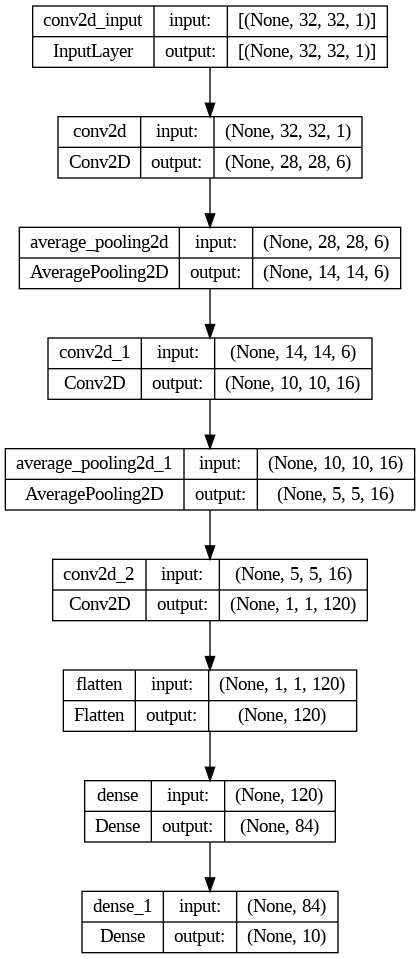

In [ ]:
plot_model(model, 'digit.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

import time
start = time.time()

history = model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(X_test, y_test))

end = time.time()
print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/20
469/469 [==============================] - 61s 119ms/step - loss: 0.1961 - accuracy: 0.9402 - val_loss: 0.0680 - val_accuracy: 0.9790
Epoch 2/20
469/469 [==============================] - 70s 149ms/step - loss: 0.0582 - accuracy: 0.9816 - val_loss: 0.0447 - val_accuracy: 0.9845
Epoch 3/20
469/469 [==============================] - 65s 138ms/step - loss: 0.0416 - accuracy: 0.9870 - val_loss: 0.0402 - val_accuracy: 0.9871
Epoch 4/20
469/469 [==============================] - 42s 89ms/step - loss: 0.0352 - accuracy: 0.9884 - val_loss: 0.0428 - val_accuracy: 0.9860
Epoch 5/20
469/469 [==============================] - 47s 101ms/step - loss: 0.0296 - accuracy: 0.9902 - val_loss: 0.0418 - val_accuracy: 0.9868
Epoch 6/20
469/469 [==============================] - 40s 86ms/step - loss: 0.0244 - accuracy: 0.9921 - val_loss: 0.0337 - val_accuracy: 0.9888
Epoch 7/20
469/469 [==============================] - 54s 115ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0393 - val_accu

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {:.3f}'.format(score[1]))

313/313 [==============================] - 3s 11ms/step - loss: 0.0331 - accuracy: 0.9916
Accuracy: 0.992


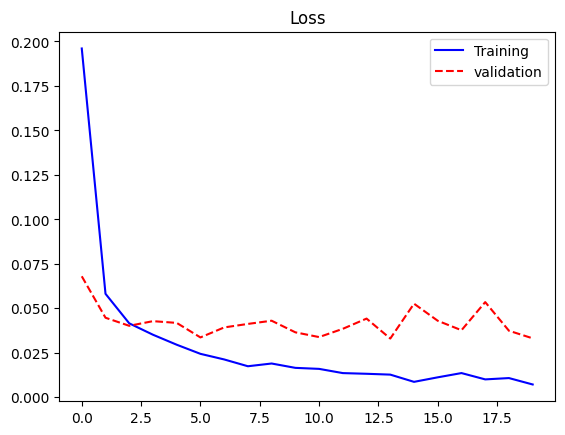

In [ ]:
plt.plot(history.history['loss'], color='b', label='Training')
plt.plot(history.history['val_loss'], 'r--', label='validation')
plt.title('Loss')
plt.legend()
plt.show()

# Workshop 2: CNN จำแนก Dog Cat

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## โหลดข้อมูลจาก Kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bossmagician","key":"4930d01640773a3fe3b513722a330f19"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          22769        632  1.0              
mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file           Netflix OTT Revenue and Subscribers (CSV File)        2KB  2023-05-13 17:40:23           1189         29  1.0              
darshanprabhu09/stock-prices-for                                      Stock prices of Amazon , Microsoft , Google, Apple   85KB  2023-05-16 15:17:16           1163         32  1.0              
fatihb/coffee-quality-data-cqi

In [ ]:
! kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:09<00:00, 64.6MB/s]
100% 1.06G/1.06G [00:09<00:00, 115MB/s] 


In [ ]:
! unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

## อ่านข้อมูล

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory('/content/dogs_vs_cats/train', target_size=(64,64), batch_size=32, class_mode='binary')

Found 20000 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory('/content/dogs_vs_cats/test', target_size=(64,64), batch_size=32, class_mode='binary')

Found 5000 images belonging to 2 classes.


## Visualization

In [ ]:
print('Training')
ids, counts = np.unique(train_set.classes, return_counts=True)
print(ids)
print(counts)

labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

for i in ids:
  print('{:>6} = {}'.format(labels[i], counts[i]))

Training
[0 1]
[10000 10000]
{0: 'cats', 1: 'dogs'}
  cats = 10000
  dogs = 10000


In [ ]:
print('Test')
ids, counts = np.unique(test_set.classes, return_counts=True)
print(ids)
print(counts)

labels = (test_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

for i in ids:
  print('{:>6} = {}'.format(labels[i], counts[i]))

Test
[0 1]
[2500 2500]
{0: 'cats', 1: 'dogs'}
  cats = 2500
  dogs = 2500


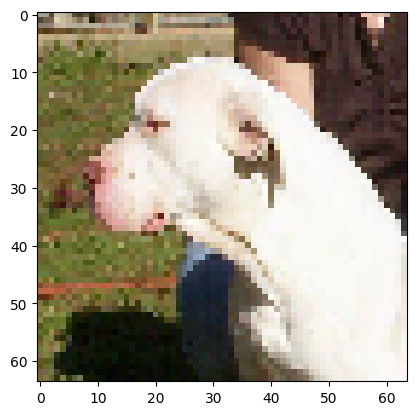

In [ ]:
plt.imshow(train_set[0][0][0])
plt.show()

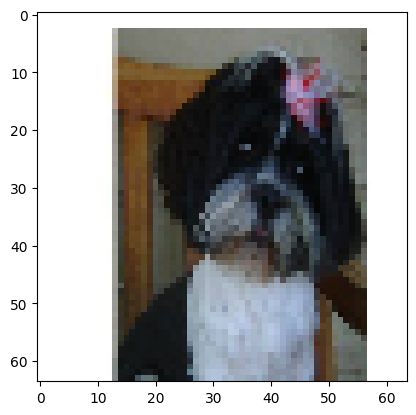

In [ ]:
plt.imshow(test_set[0][0][0])
plt.show()

## สร้าง Model

In [ ]:
from tensorflow.keras.layers import Dropout, MaxPool2D

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)       

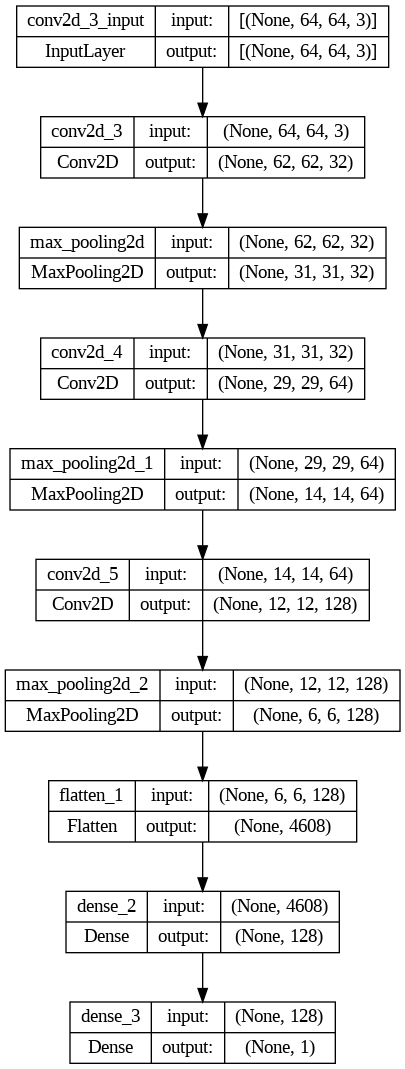

In [ ]:
plot_model(model, 'digit1.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()
history = model.fit(train_set, steps_per_epoch=len(train_set), validation_data=test_set, epochs=20, verbose=1)

end = time.time()
print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/20
625/625 [==============================] - 252s 401ms/step - loss: 0.4351 - accuracy: 0.7962 - val_loss: 0.4036 - val_accuracy: 0.8158
Epoch 2/20
625/625 [==============================] - 252s 402ms/step - loss: 0.3782 - accuracy: 0.8317 - val_loss: 0.4153 - val_accuracy: 0.8128
Epoch 3/20
625/625 [==============================] - 273s 436ms/step - loss: 0.3340 - accuracy: 0.8549 - val_loss: 0.3999 - val_accuracy: 0.8202
Epoch 4/20
625/625 [==============================] - 268s 429ms/step - loss: 0.2802 - accuracy: 0.8781 - val_loss: 0.3580 - val_accuracy: 0.8406
Epoch 5/20
625/625 [==============================] - 270s 432ms/step - loss: 0.2362 - accuracy: 0.8994 - val_loss: 0.3811 - val_accuracy: 0.8498
Epoch 6/20
625/625 [==============================] - 265s 424ms/step - loss: 0.1917 - accuracy: 0.9209 - val_loss: 0.3974 - val_accuracy: 0.8438
Epoch 7/20
625/625 [==============================] - 266s 425ms/step - loss: 0.1508 - accuracy: 0.9390 - val_loss: 0.4614 -

## ประเมิน

score = 0.847


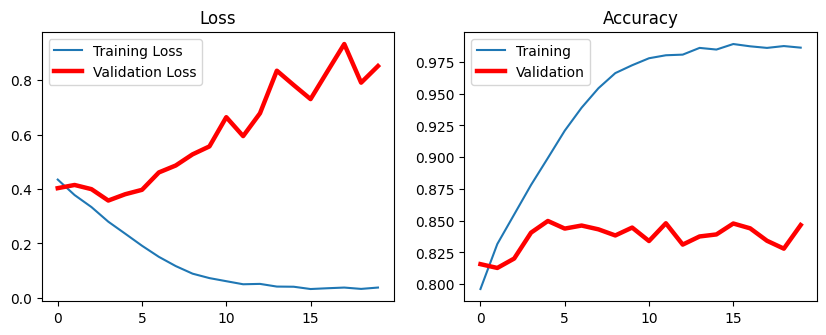

In [ ]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.title("Loss")
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], 'r', lw=3.2, label='Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy")
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')
plt.legend()

acc = model.evaluate(test_set, steps=len(test_set), verbose=0)
print('score = {:.3f}'.format(acc[1]))

## การทดสอบและการใช้งาน Model Predict ภาพ

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

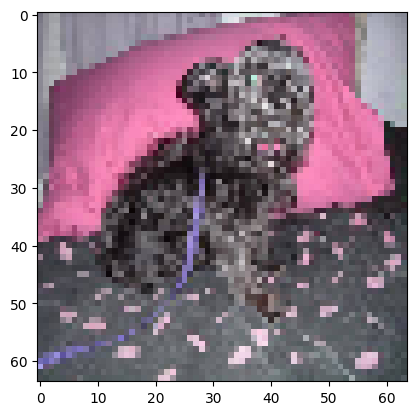

In [ ]:
test_image = load_img('/content/dog.0.jpg', target_size=(64,64))
test_image = img_to_array(test_image)
test_image /= 255.0

plt.imshow(test_image)
plt.show()

In [ ]:
def predict_dog_cat(lst):
  y_pred = []; y_pred_cls = []; img_lst = []
  for i in lst:
    img = load_img(i, target_size=(64,64))
    img = img_to_array(img)
    img /= 255.0
    img_lst.append(img)

    img = np.expand_dims(img, axis=0)
    y_pred_i = model.predict(img)
    y_pred_cls_i = 'Dog' if y_pred_i > 0.5 else 'Cat'
    y_pred.append(y_pred_i)
    y_pred_cls.append(y_pred_cls_i)

  return img_lst, y_pred_cls, y_pred

1/1 [==============================] - 0s 27ms/step


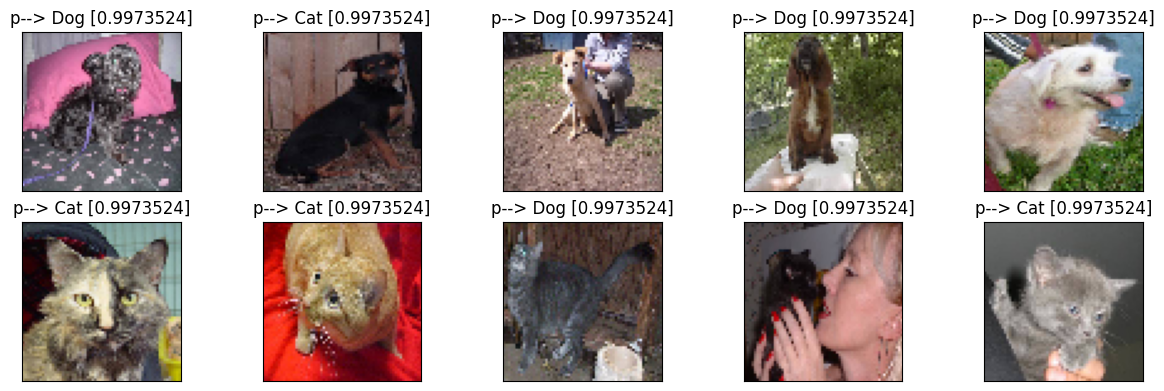

In [ ]:
img_lst, y_pred_cls, y_pred = predict_dog_cat(['/content/dog.0.jpg', '/content/dog.18.jpg', '/content/dog.22.jpg', '/content/dog.5.jpg', '/content/dog.9.jpg',
                                               '/content/cat.10.jpg', '/content/cat.18.jpg', '/content/cat.22.jpg', '/content/cat.26.jpg', '/content/cat.28.jpg'])

fig = plt.figure(figsize=(15, 7))
for i, k in enumerate(img_lst):
  plt.subplot(3, 5, i+1)
  plt.imshow(k, cmap=plt.cm.gray_r)
  plt.title('p--> {0} {1}'.format(y_pred_cls[i], y_pred[0][0]))
  plt.xticks([])
  plt.yticks([])
plt.show()

# Workshop 3: Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, height_shift_range=0.15, width_shift_range=0.15, shear_range=0.9, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

train_set = train_datagen.flow_from_directory('/content/dogs_vs_cats/train', target_size=(64,64), batch_size=32, class_mode='binary')

Found 20000 images belonging to 2 classes.


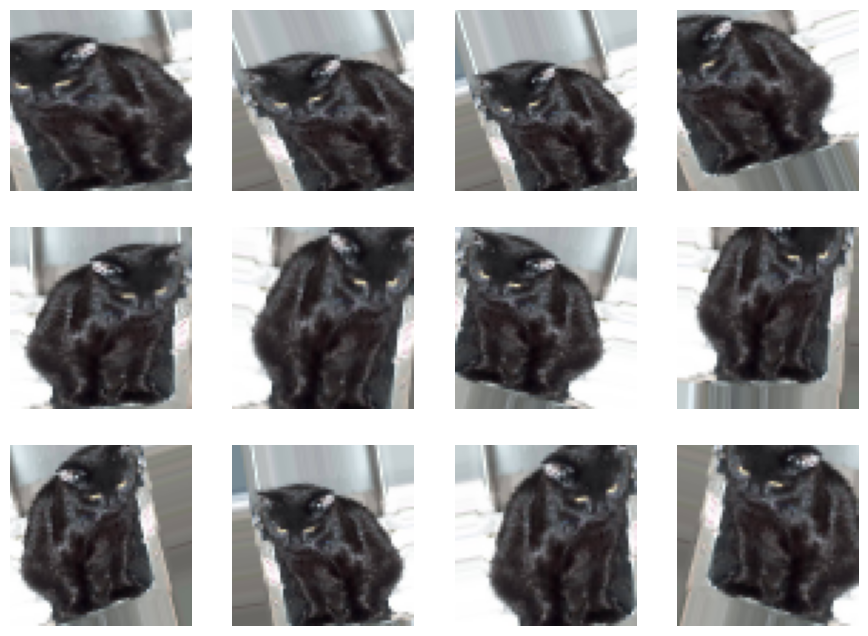

In [ ]:
nplots = 12

def visual_multi(images_arr):
  fig = plt.figure(figsize=(11,8))
  for j in range(nplots):
    plt.subplot(3, 4, j+1)
    plt.imshow(images_arr[j])
    plt.axis('off')
  plt.show()

augmented_images = [train_set[0][0][0] for i in range(nplots)]
visual_multi(augmented_images)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)       

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()
history = model.fit(train_set, steps_per_epoch=len(train_set), validation_data=test_set, epochs=20, verbose=1)

end = time.time()
print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/20
625/625 [==============================] - 290s 462ms/step - loss: 0.6287 - accuracy: 0.6367 - val_loss: 0.5368 - val_accuracy: 0.7280
Epoch 2/20
625/625 [==============================] - 285s 456ms/step - loss: 0.5680 - accuracy: 0.7032 - val_loss: 0.4863 - val_accuracy: 0.7638
Epoch 3/20
625/625 [==============================] - 280s 448ms/step - loss: 0.5212 - accuracy: 0.7388 - val_loss: 0.4790 - val_accuracy: 0.7682
Epoch 4/20
625/625 [==============================] - 280s 447ms/step - loss: 0.4857 - accuracy: 0.7664 - val_loss: 0.4120 - val_accuracy: 0.8060
Epoch 5/20
625/625 [==============================] - ETA: 0s - loss: 0.4613 - accuracy: 0.7811

KeyboardInterrupt: ignored

score = 0.862


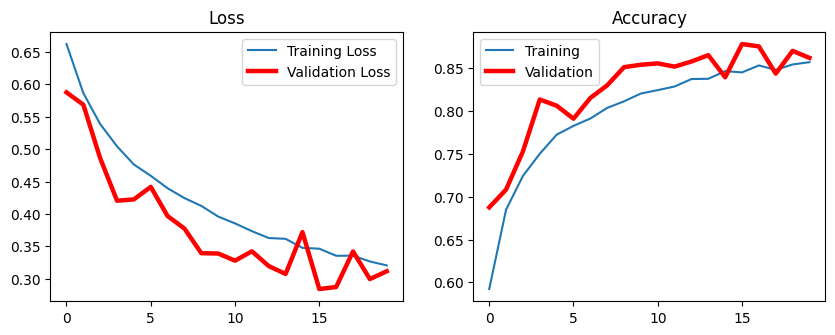

In [ ]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.title("Loss")
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], 'r', lw=3.2, label='Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy")
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')
plt.legend()

acc = model.evaluate(test_set, steps=len(test_set), verbose=0)
print('score = {:.3f}'.format(acc[1]))

# Workshop 4: การใช้ VGG จำแนกภาพ

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

In [ ]:
model = VGG16(weights='imagenet')
model.summary()

553467096/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

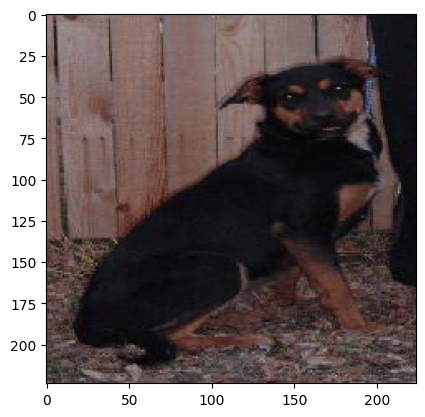

In [ ]:
image = load_img('/content/dog.18.jpg', target_size=(224, 224))
plt.imshow(image)

min max (before) = 0.0 187.0
min max (after) = -123.68 66.061


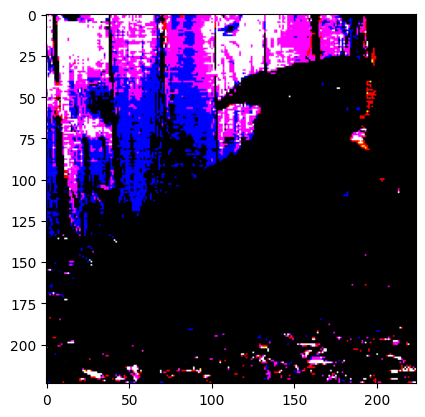

In [ ]:
image = img_to_array(image)
print('min max (before) =', image.min(), image.max())

image = np.expand_dims(image, axis=0)

image = preprocess_input(image)
print('min max (after) =', image.min(), image.max())
plt.imshow(image[0])

In [ ]:
pred = model.predict(image)

pred_decode = decode_predictions(pred, top=3)[0]
pred_decode

35363/35363 [==============================] - 0s 0us/step


[('n02106550', 'Rottweiler', 0.48128948),
 ('n02105412', 'kelpie', 0.23726967),
 ('n02107312', 'miniature_pinscher', 0.09764477)]

In [ ]:
def predict(img_fname):
  img = load_img(img_fname, target_size=(224,224))
  plt.imshow(img)
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = preprocess_input(img)

  pred = model.predict(img)
  pred_decode = decode_predictions(pred, top=3)[0]

  print('Predicted: {} {:.2f}%'.format(pred_decode[0][1], pred_decode[0][2] * 100))
  for i in pred_decode:
    print('{:17} {:6.3f}'.format(i[1], i[2]))

1/1 [==============================] - 1s 1s/step
Predicted: cairn 19.95%
cairn              0.200
Lhasa              0.190
briard             0.139


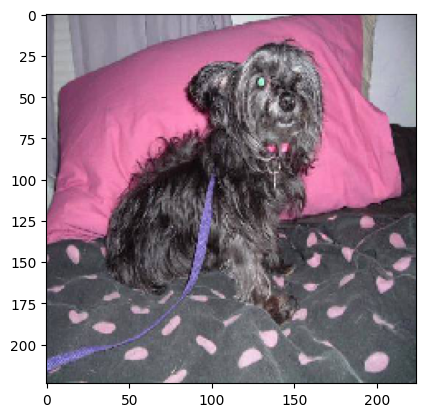

In [ ]:
predict('/content/dog.0.jpg')

1/1 [==============================] - 2s 2s/step
Predicted: Persian_cat 24.37%
Persian_cat        0.244
tabby              0.076
Egyptian_cat       0.072


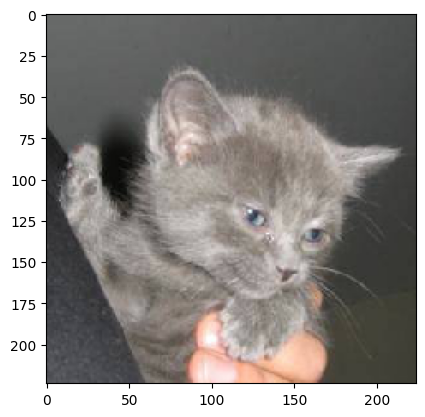

In [ ]:
predict('/content/cat.28.jpg')

# Workshop 5: การใช้ ResNet จำแนกภาพ

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

In [ ]:
model = ResNet50(weights='imagenet')
model.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

1/1 [==============================] - 1s 1s/step
Predicted: cocker_spaniel 30.23%
cocker_spaniel     0.302
Scotch_terrier     0.169
affenpinscher      0.116


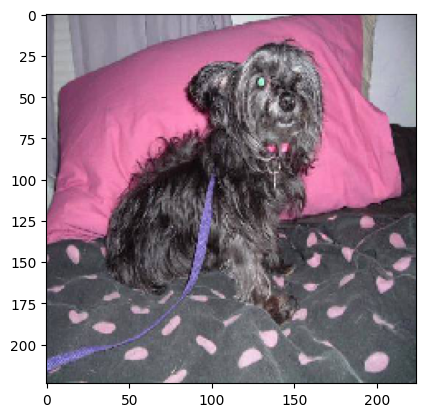

In [ ]:
predict('/content/dog.0.jpg')

1/1 [==============================] - 0s 247ms/step
Predicted: Persian_cat 13.09%
Persian_cat        0.131
schipperke         0.067
lynx               0.062


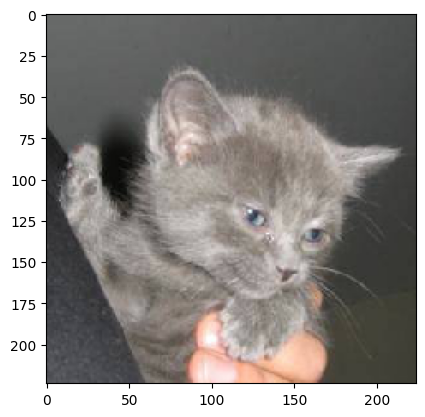

In [ ]:
predict('/content/cat.28.jpg')